 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)


In [3]:
# Count nulls
whale_df.isnull().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()
# YOUR CODE HERE

In [6]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
# YOUR CODE HERE

In [8]:
# Count nulls
algo_df.isnull().sum()
# YOUR CODE HERE

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df = algo_df.dropna()
# YOUR CODE HERE

In [10]:
algo_df.isnull().sum()
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)

In [12]:
# Check Data Types
sp500_df.dtypes
# YOUR CODE HERE

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_df['Close']=sp500_df['Close'].str.replace('$','')
sp500_df['Close'] = sp500_df['Close'].astype('float')
# YOUR CODE HERE

In [14]:
sp500_df.dtypes

Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
sp500_df['Close'] = sp500_df['Close'].pct_change()

# YOUR CODE HERE

In [16]:
# Drop nulls
sp500_df = sp500_df.dropna()
# YOUR CODE HERE

In [17]:
# Rename Column
sp500_df.columns = ['S&P']
sp500_df.head()
# YOUR CODE HERE

,S&P
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [45]:
# Concatenate all DataFrames into a single DataFrame

combined_df = pd.concat([sp500_df,algo_df,whale_df],axis='columns',join= 'inner' )

combined_df = combined_df.sort_index()

combined_df
# YOUR CODE HERE

,S&P,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,0.004408,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.001195,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

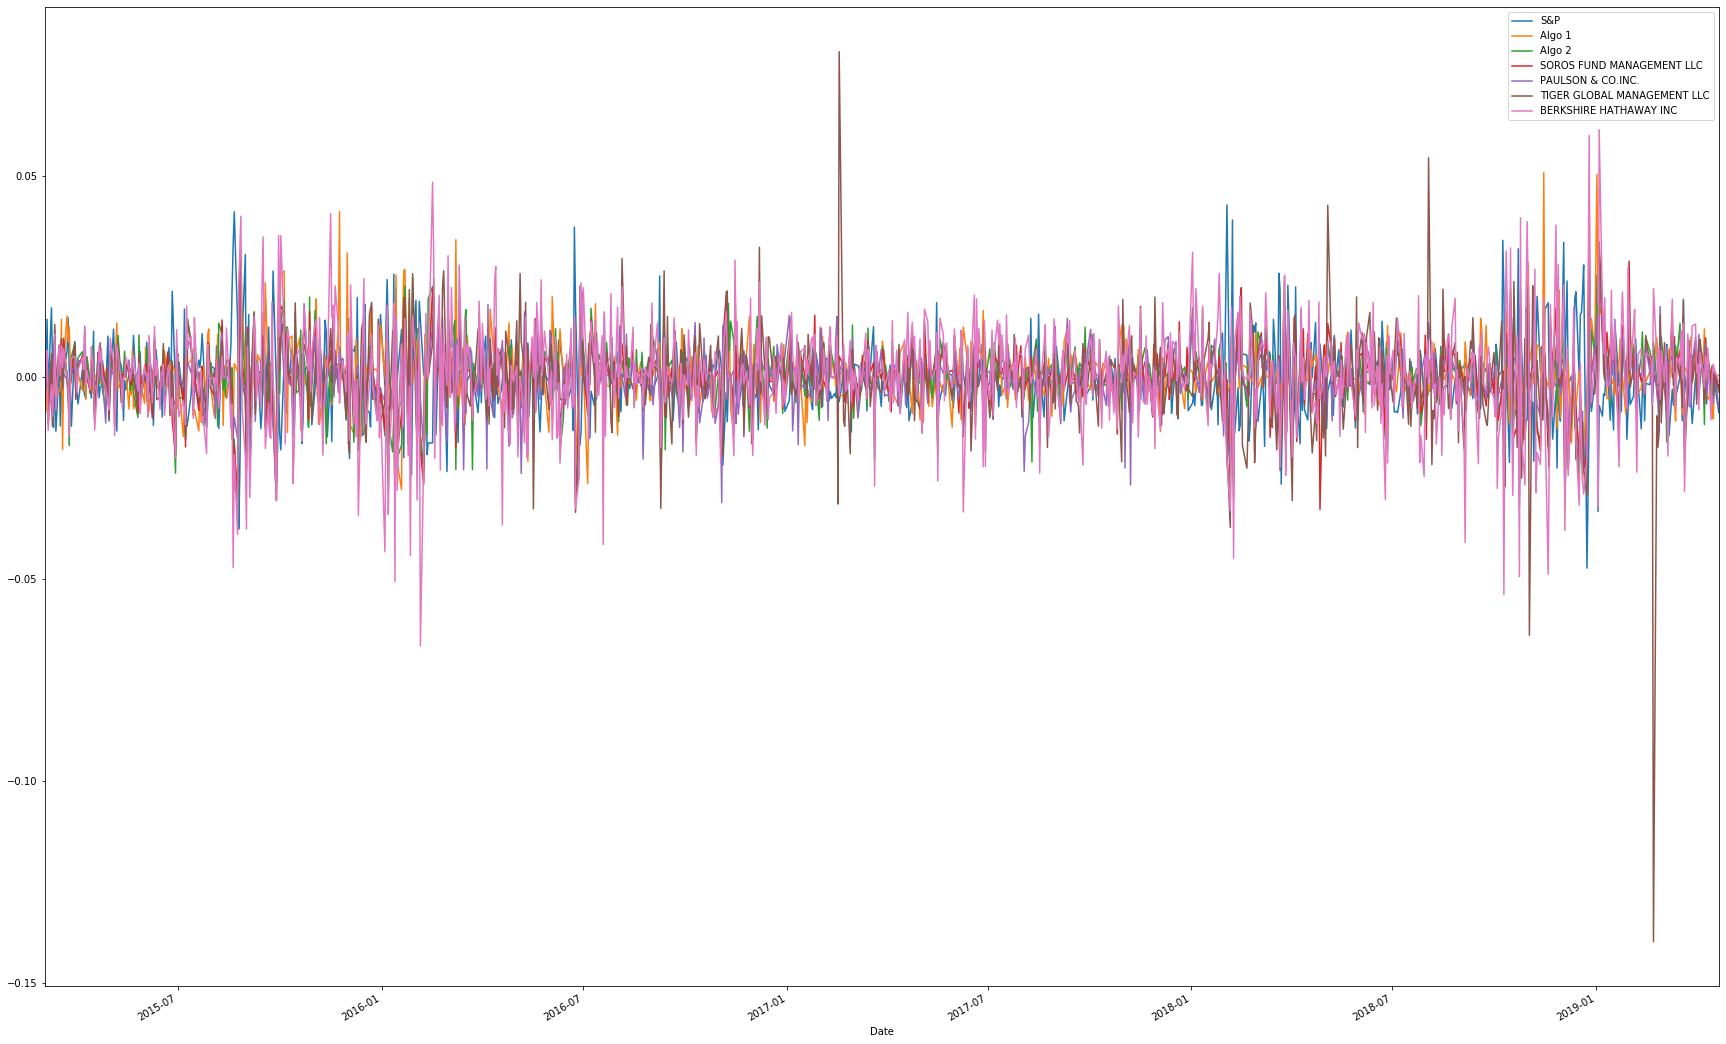

In [19]:
# Plot daily returns
combined_df.plot(figsize=(30,20))
# YOUR CODE HERE

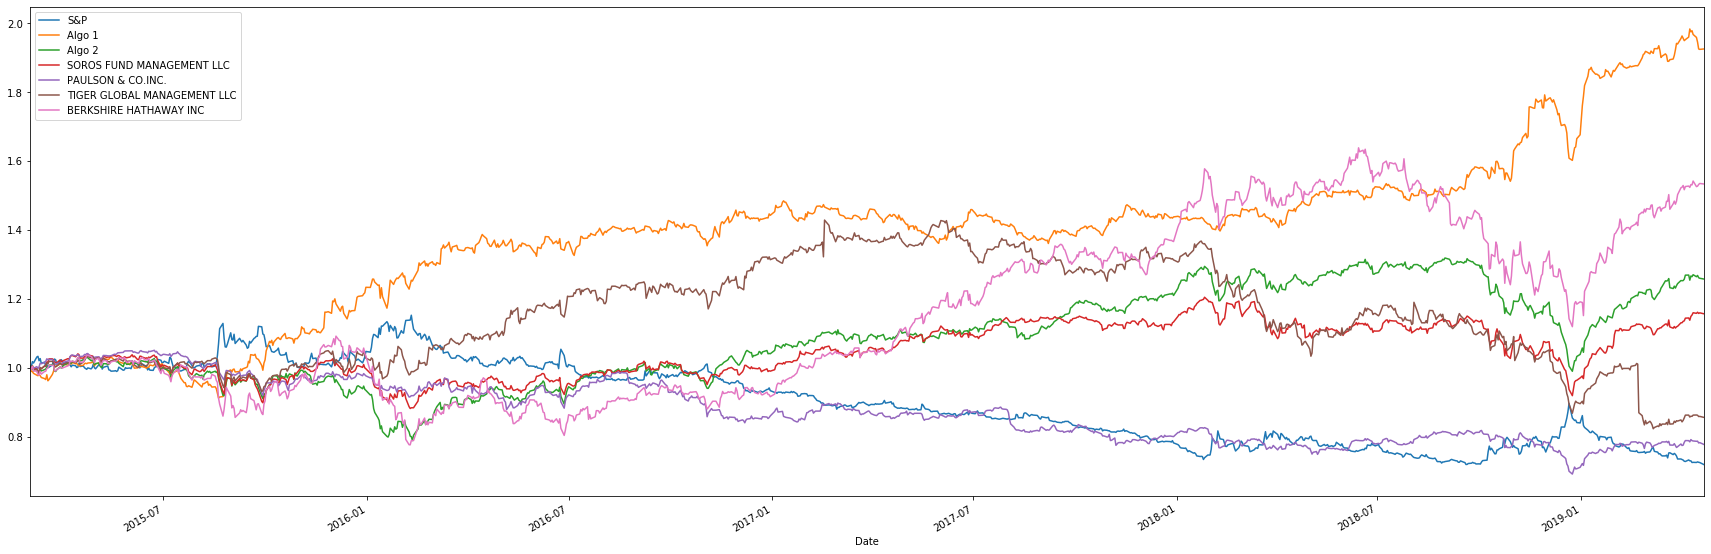

In [20]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(30,10))

# YOUR CODE HERE

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

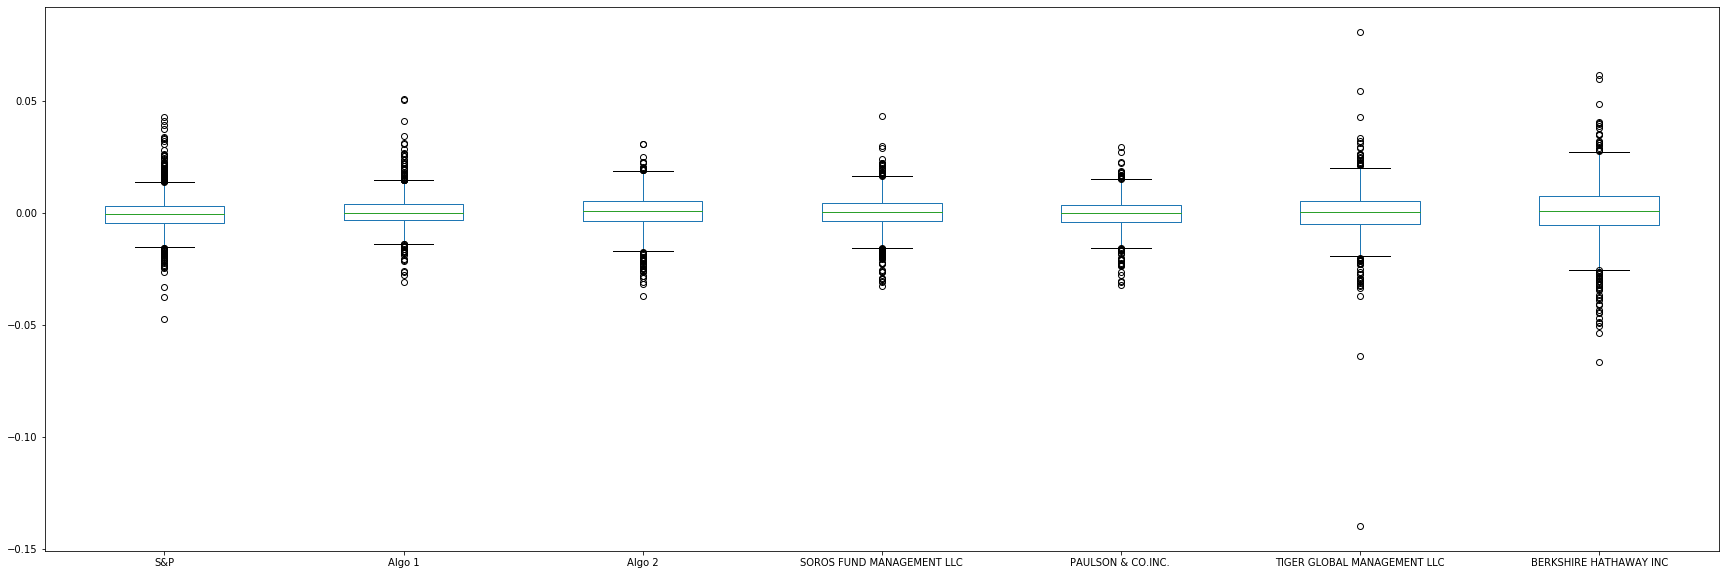

In [21]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(30,10))
# YOUR CODE HERE

In [22]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
combined_std = combined_df.std()
combined_std
# YOUR CODE HERE

S&P                            0.008587
Algo 1                         0.007623
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [23]:
# Determine which portfolios are riskier than the S&P 500
combined_std.sort_values(ascending = False)
# YOUR CODE HERE

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P                            0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [24]:
# Calculate the annualized standard deviation (252 trading days)
combined_annual_std = combined_std*np.sqrt(252)
combined_annual_std
# YOUR CODE HERE

S&P                            0.136313
Algo 1                         0.121006
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

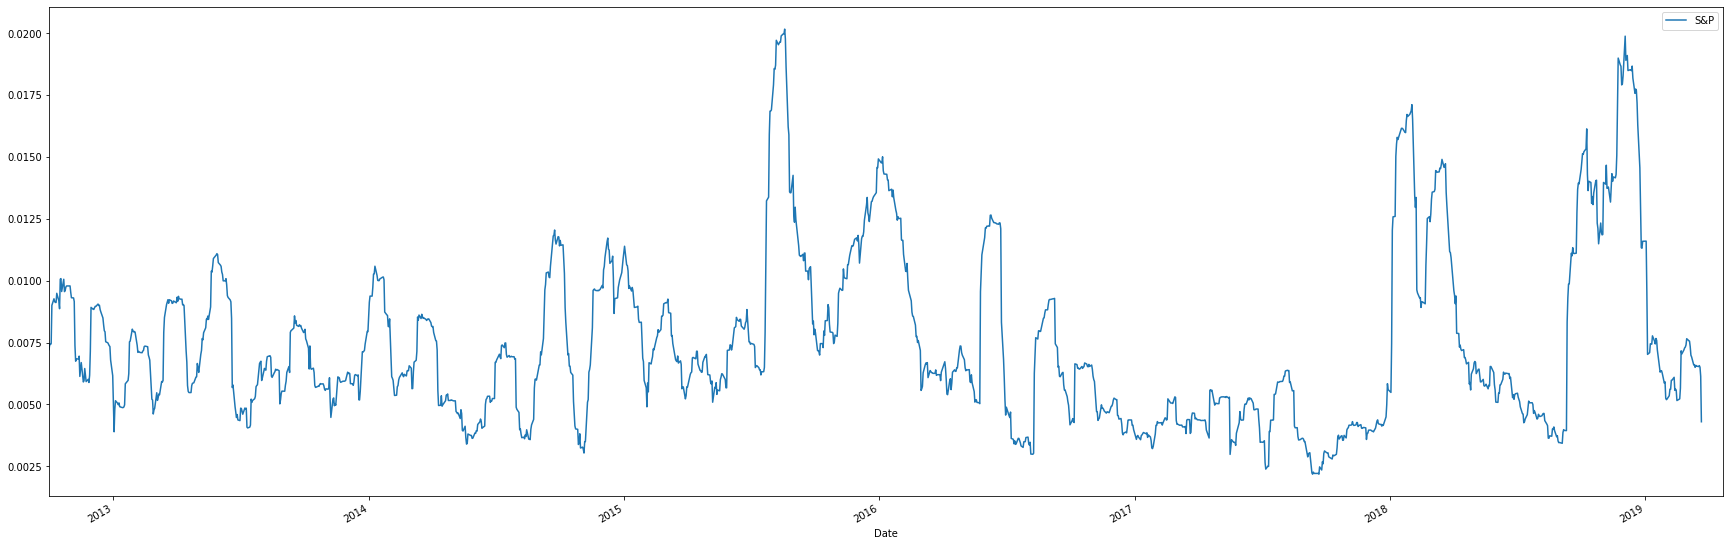

In [25]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_std_rolling = sp500_df.rolling(window=21).std().plot(figsize=(30,10))

# YOUR CODE HERE

In [26]:
# Correlation
correlation = combined_df.corr()
correlation
# YOUR CODE HERE

,S&P,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P,1.000000,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856
Algo 1,-0.033963,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678
Algo 2,-0.002192,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756
SOROS FUND MANAGEMENT LLC,0.000574,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157
PAULSON & CO.INC.,0.013549,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125
BERKSHIRE HATHAWAY INC,-0.013856,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000


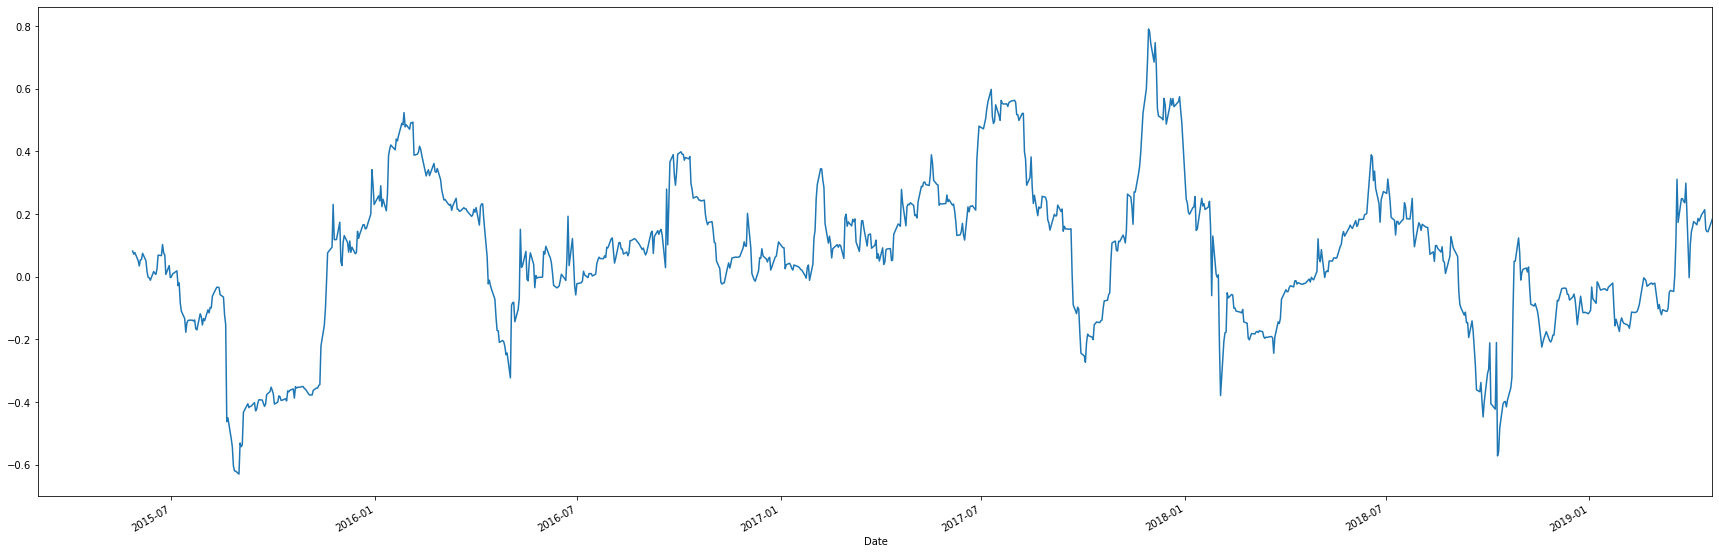

In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance_BERKSHIRE_HATHAWAY = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(combined_df['S&P'])
varinace_SP500 = combined_df['S&P'].rolling(window = 60).var()
beta_BERKSHIRE_HATHAWAY = covariance_BERKSHIRE_HATHAWAY / varinace_SP500
beta_BERKSHIRE_HATHAWAY.plot(figsize = (30,10))
# YOUR CODE HERE

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [91]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [28]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
# YOUR CODE HERE

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

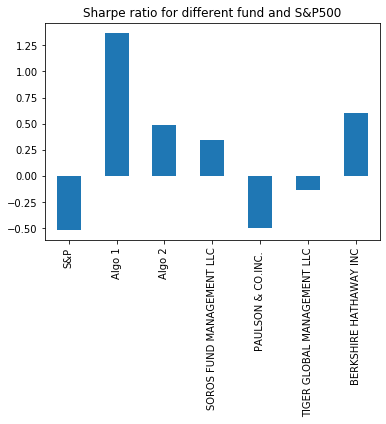

In [75]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe ratio for different fund and S&P500')
# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [146]:
# Read the first stock
# YOUR CODE HERE
BABA_csv = Path('Resources/BABA_historical.csv')
baba_df = pd.read_csv(BABA_csv)
baba_df['Date'] = pd.to_datetime(baba_df['Date']).dt.normalize()
baba_df= baba_df.set_index(['Date'])
baba_df= baba_df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5',
                                 'Unnamed: 6','Unnamed: 7','Unnamed: 8'])

In [147]:
# Read the second stock
# YOUR CODE HERE
JD_csv = Path('Resources/JD_historical.csv')
jd_df = pd.read_csv(JD_csv)
jd_df['Date'] = pd.to_datetime(jd_df['Date']).dt.normalize()
jd_df= jd_df.set_index(['Date'])
jd_df = jd_df.drop(columns = ['Unnamed: 2'])


In [149]:
# Read the third stock
# YOUR CODE HERE
BAIDU_csv =Path('Resources/BAIDU_historical.csv')
baidu_df = pd.read_csv(BAIDU_csv)
baidu_df['Date'] = pd.to_datetime(baidu_df['Date']).dt.normalize()
baidu_df= baidu_df.set_index(['Date'])


In [150]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
combine_df = pd.concat([baba_df,jd_df,baidu_df],axis = 'columns' , join = "inner")

In [151]:
# Reset the index
# YOUR CODE HERE
combine_df = combine_df.dropna()
combine_df.columns = ['BABA','JD','BAIDU']
combine_df.head()

,BABA,JD,BAIDU
Date,,,
2019-01-02,136.70,21.27,162.25
2019-01-03,130.60,20.35,154.71
2019-01-04,139.75,22.27,160.95
2019-01-07,143.10,22.76,162.60
2019-01-08,146.79,22.95,163.40


In [152]:
# Drop Nulls
# YOUR CODE HERE
combine_df.isnull().sum()

BABA     0
JD       0
BAIDU    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [153]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
combine_daily_change = combine_df.pct_change()
combine_daily_change= combine_daily_change.dropna()
weighted_return = combine_daily_change.dot(weights)

# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [189]:
# YOUR CODE HERE

combined_all_portfolio = pd.concat([weighted_return,combined_df],axis = 'columns',join='inner')
combined_all_portfolio.columns=['My portfolio','S&P500','Algo 1','Algo 2','SOROS FUND MANAGEMENT LLC',
                                'PAULSON & CO.INC','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC']


In [190]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_all_portfolio=combined_all_portfolio.dropna()
combined_all_portfolio


,My portfolio,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2019-01-03,-0.044783,-0.033196,0.015246,-0.011792,-0.007848,-0.007403,-0.008478,-0.032053
2019-01-04,0.068248,-0.006962,0.017622,0.030509,0.029881,0.027032,0.033560,0.061341
2019-01-07,0.018742,-0.009602,0.014748,0.016942,0.009051,0.014475,0.014111,0.017185
2019-01-08,0.013018,-0.004081,0.010825,0.010479,0.010760,0.008050,0.001544,0.005851
2019-01-09,0.029007,-0.004498,0.000214,0.009658,0.008630,-0.000800,-0.000534,0.019788
...,...,...,...,...,...,...,...,...
2019-04-15,-0.028739,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,0.010926,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,0.002605,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [191]:
# Risk
combined_all_portfolio.std()
# YOUR CODE HERE

My portfolio                   0.019163
S&P500                         0.007221
Algo 1                         0.005752
Algo 2                         0.007662
SOROS FUND MANAGEMENT LLC      0.007500
PAULSON & CO.INC               0.006999
TIGER GLOBAL MANAGEMENT LLC    0.018367
BERKSHIRE HATHAWAY INC         0.012905
dtype: float64

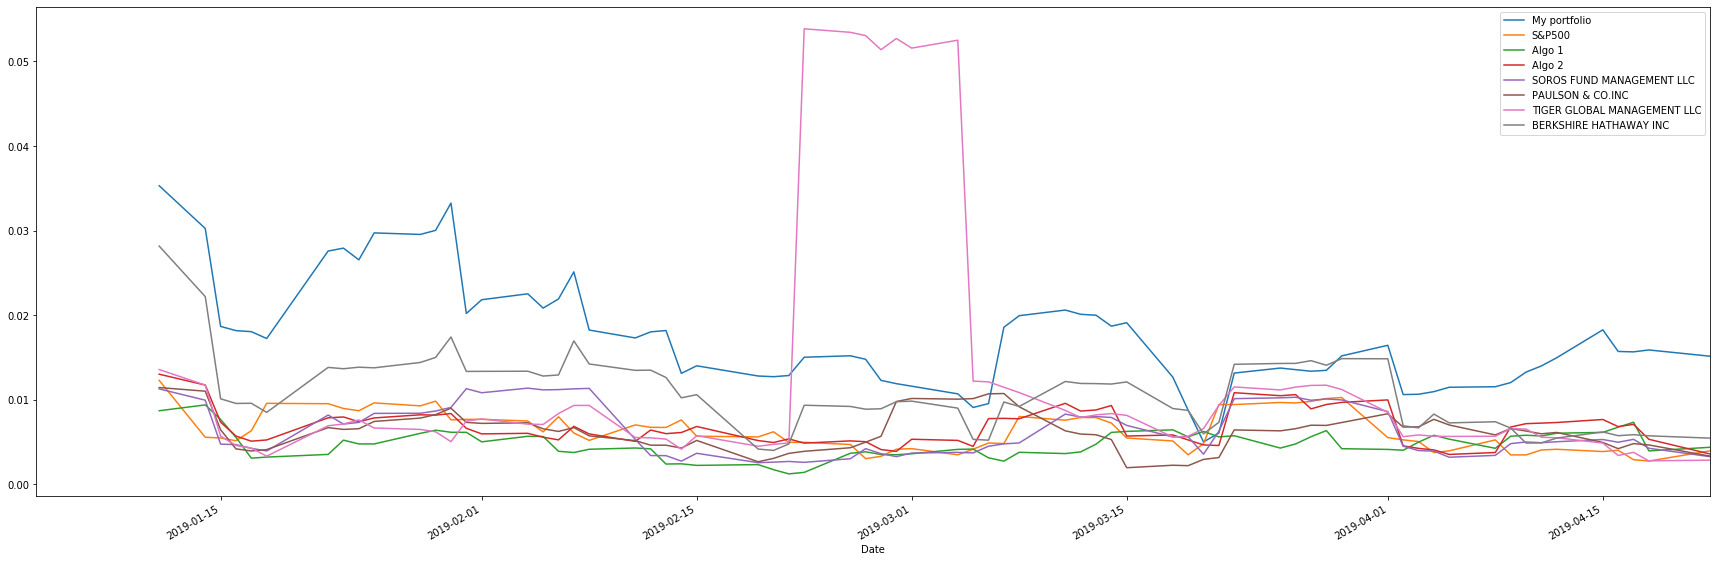

In [198]:
# Rolling
my_portfolio_std_rolling = combined_all_portfolio.rolling(window=7).std().plot(figsize=(30,10))
# YOUR CODE HERE

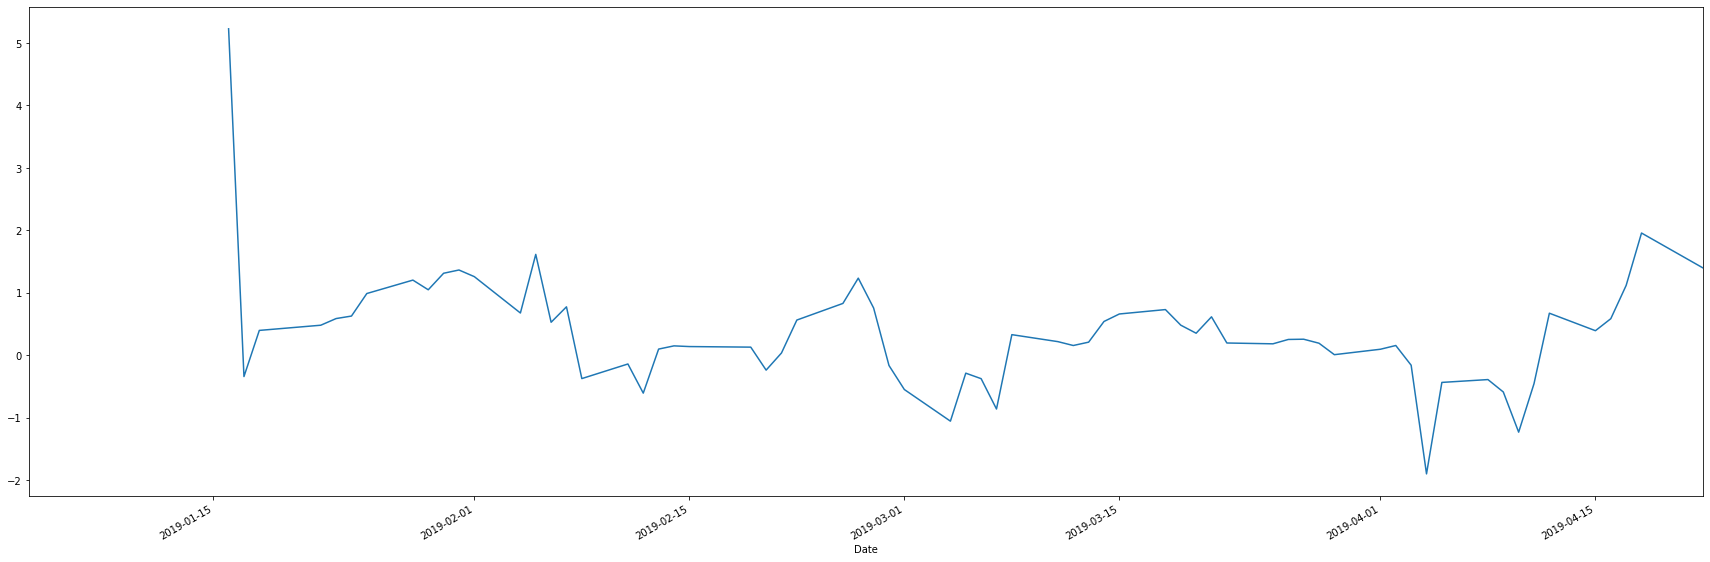

In [199]:
# Beta
covariance_my_portfolio = combined_all_portfolio['My portfolio'].rolling(window = 10).cov(combined_all_portfolio['S&P500'])
varinace_SP500 = combined_all_portfolio['S&P500'].rolling(window = 7).var()
beta_my_portfolio = covariance_my_portfolio / varinace_SP500
beta_my_portfolio.plot(figsize = (30,10))
# YOUR CODE HERE

In [204]:
# Annualzied Sharpe Ratios
all_portfolio_sharpe_ratios = (combined_all_portfolio.mean() * 252) / (combined_all_portfolio.std() * np.sqrt(252))
all_portfolio_sharpe_ratios
# YOUR CODE HERE

My portfolio                   2.713700
S&P500                        -5.243403
Algo 1                         3.338481
Algo 2                         4.849457
SOROS FUND MANAGEMENT LLC      4.843614
PAULSON & CO.INC               2.276355
TIGER GLOBAL MANAGEMENT LLC   -0.461606
BERKSHIRE HATHAWAY INC         4.270627
dtype: float64

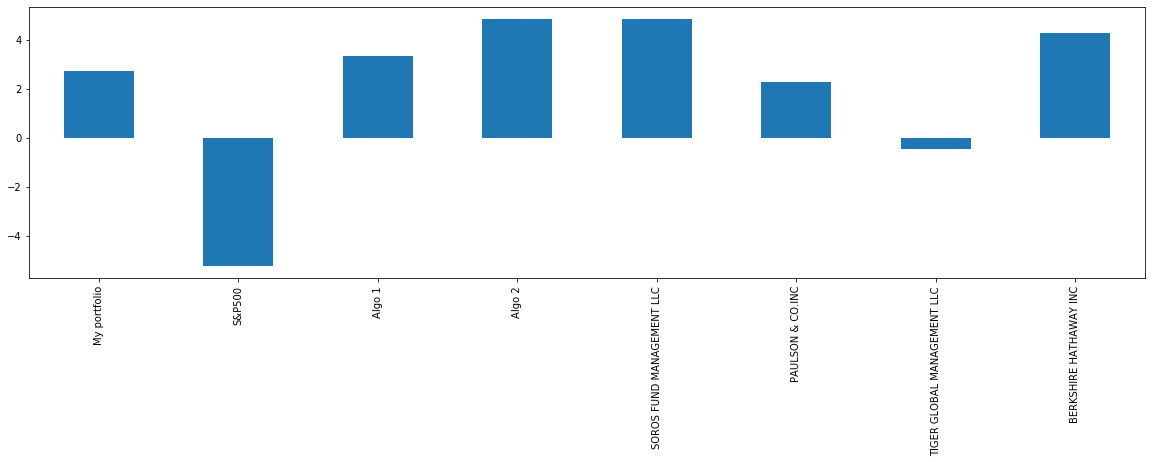

In [209]:
# Visualize the sharpe ratios as a bar plot
all_portfolio_sharpe_ratios.plot(kind='bar',figsize=(20,5))
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [42]:
# YOUR CODE HERE

In [212]:
all_portfolio_corr = combined_all_portfolio.corr()
all_portfolio_corr

,My portfolio,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
My portfolio,1.000000,0.205806,0.139590,0.699696,0.635423,0.614237,0.133716,0.847492
S&P500,0.205806,1.000000,-0.297747,0.057401,0.129629,-0.006394,0.012308,0.166287
Algo 1,0.139590,-0.297747,1.000000,0.111214,0.086821,0.144765,0.019449,0.161254
Algo 2,0.699696,0.057401,0.111214,1.000000,0.806153,0.737801,0.194660,0.777624
SOROS FUND MANAGEMENT LLC,0.635423,0.129629,0.086821,0.806153,1.000000,0.749619,0.354967,0.739745
PAULSON & CO.INC,0.614237,-0.006394,0.144765,0.737801,0.749619,1.000000,0.267402,0.617651
TIGER GLOBAL MANAGEMENT LLC,0.133716,0.012308,0.019449,0.194660,0.354967,0.267402,1.000000,0.132445
BERKSHIRE HATHAWAY INC,0.847492,0.166287,0.161254,0.777624,0.739745,0.617651,0.132445,1.000000


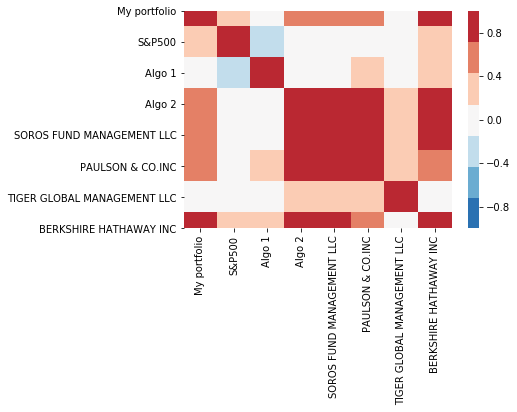

In [214]:
import seaborn as sns
sns.heatmap(all_portfolio_corr, vmin=-1, vmax=1, cmap=sns.color_palette("RdBu_r", 7))